### Machine Learning and Statistics - 2021 Project Submission

### GMIT Higher Diploma in Data Analytics

### Submitted by Fiona Lee - 19 December 2021
<br/>

### Overview of the SciPy Stats python library
___________________



##### What is SciPy Stats?

The SciPy Stats module (also known as 'statistical functions') is a subpackage and important feature of SciPy.  SciPy is an open-source library consisting of a package for statistical functions based on NumPy, Pandas, Matplotlib, SymPy.  

The stats module of SciPy is a statistics library for python containing all of the probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and others. It is described as being "like library code in the veins of numpy and scipy". 

##### What is SciPy Stats used for and what is it used for?

Scipy Stats is mainly used for probabilistic distributions and statistical operations.  It is useful for obtaining probabilistic distributions. SciPy Stats can generate discrete or continuous random numbers. It also consists of many other functions to generate descriptive statistical values.

It can also be used to deal with random and continuous variables and to perform 'T-tests' on the data.  The 'T-score' value generated by the T-test describes the relative difference between the mean (average) values of two arrays. The smaller the value, the more similar the arrays are and vice versa.

##### Probability Distributions in SciPy Stats

The probability density function (pdf) is a statistical expression that defines a probability distribution (the likelihood of an outcome) for a discrete random variable as opposed to a continuous random variable. 

The cumulative distribution function (cdf) calculates the cumulative probability for a given x-value

##### SciPy Stats consists of three classes:

- ##### rv_continuous

A generic continuous random variable (i.e. the variable can take any value class) meant for subclassing through which we can construct specific distribution sub-classes and instances for continuous random variables.  

New random variables can be defined by subclassing the rv_continuous class and re-defining the pdf or the cdf method.

- ##### rv_discrete

A generic discrete random variable class through which we can construct specific distribution sub-classes and instances for discrete random variables.

- ##### rv_histogram 

Used to generate specific distribution histograms.

### Example hypothesis test using ANOVA
__________________

An ANOVA test is a way to find out if survey or experiment results are significant. In other words, they help you to figure out if you need to reject the null hypothesis or accept the alternate hypothesis. Basically, you’re testing groups to see if there’s a difference between them.

**When to use a one-way ANOVA** <Br/>
Use a one-way ANOVA when you have collected data about one categorical independent variable and one quantitative dependent variable. The independent variable should have at least three levels (i.e. at least three different groups or categories).

ANOVA tells you if the dependent variable changes according to the level of the independent variable. For example:

Your independent variable is social media use, and you assign groups to low, medium, and high levels of social media use to find out if there is a difference in hours of sleep per night.
Your independent variable is brand of soda, and you collect data on Coke, Pepsi, Sprite, and Fanta to find out if there is a difference in the price per 100ml.
You independent variable is type of fertilizer, and you treat crop fields with mixtures 1, 2 and 3 to find out if there is a difference in crop yield.
The null hypothesis (H0) of ANOVA is that there is no difference among group means. The alternate hypothesis (Ha) is that at least one group differs significantly from the overall mean of the dependent variable.

ANOVA determines whether the groups created by the levels of the independent variable are statistically different by calculating whether the means of the treatment levels are different from the overall mean of the dependent variable.

If any of the group means is significantly different from the overall mean, then the null hypothesis is rejected.

If you only want to compare two groups, use a t-test instead.

In [1]:
# Import modules

# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns
import matplotlib.pyplot as plt

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Norm & specials.
import scipy.special as spec

# For t-tests and ANOVA.
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import f_oneway 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Read in the abalone dataset
df = pd.DataFrame(pd.read_csv("abalone.csv" , names = None , index_col = None))
df.columns=['Sex','Length', 'Diameter', 'Height','Whole_Weight', 'Schucked_Weight', 'Viscera_Weight', 'Shell_Weight','Age']
df

,Sex,Length,Diameter,Height,Whole_Weight,Schucked_Weight,Viscera_Weight,Shell_Weight,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<br>

### Test the assumptions:

#### Assumption 1: Dependent variable

***

In [3]:
# Pick 'Height' as the dependent variable.
pd.set_option("display.precision", 3)
dependent = df['Height']
dependent

0       0.090
1       0.135
2       0.125
3       0.080
4       0.095
        ...  
4171    0.165
4172    0.135
4173    0.205
4174    0.150
4175    0.195
Name: Height, Length: 4176, dtype: float64

In [4]:
dependent.describe()

count    4176.000
mean        0.140
std         0.042
min         0.000
25%         0.115
50%         0.140
75%         0.165
max         1.130
Name: Height, dtype: float64

<br>

#### Assumption 2: Independent variable

***

In [5]:
# Pick 'Sex' as the independent categorical variable.
independent = df['Sex']
independent

0       M
1       F
2       M
3       I
4       I
       ..
4171    F
4172    M
4173    M
4174    F
4175    M
Name: Sex, Length: 4176, dtype: object

<br>

#### Assumption 4: Outliers

***

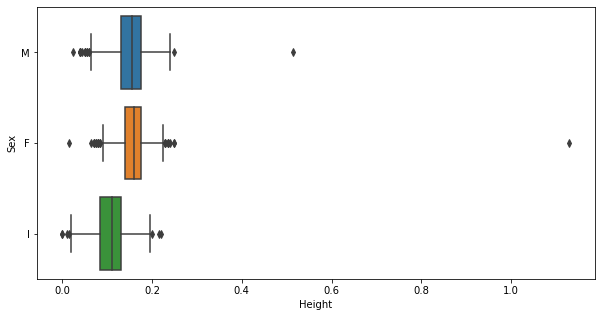

In [6]:
# Identify any possible outliers in the dataset using a boxplot
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.figure(figsize=(10, 5))
sns.boxplot(x=dependent, y=independent);

In [7]:
# Look at any samples with a height over 0.25
df[df.Height > .25]

,Sex,Length,Diameter,Height,Whole_Weight,Schucked_Weight,Viscera_Weight,Shell_Weight,Age
1416,M,0.705,0.565,0.515,2.210,1.107,0.486,0.512,10
2050,F,0.455,0.355,1.130,0.594,0.332,0.116,0.134,8


In [8]:
# Look at any samples with a height less than 0.02
df[df.Height < .02]

,Sex,Length,Diameter,Height,Whole_Weight,Schucked_Weight,Viscera_Weight,Shell_Weight,Age
235,I,0.075,0.055,0.010,0.002,0.001,5.000e-04,0.002,1
1173,F,0.635,0.495,0.015,1.157,0.511,3.080e-01,0.288,9
1256,I,0.430,0.340,0.000,0.428,0.206,8.600e-02,0.115,8
2168,I,0.165,0.115,0.015,0.015,0.005,3.000e-03,0.005,4
3995,I,0.315,0.230,0.000,0.134,0.058,2.850e-02,0.350,6


In [9]:
# Remove the obvious outliers withe a height over 0.5 & less than .02
df = df[df.Height < 0.5]

In [10]:
df = df[df.Height > 0.02]

In [11]:
# Refresh the 'dependent variable'
dependent = df['Height']

<br>

#### Assumption 5: Normality

***

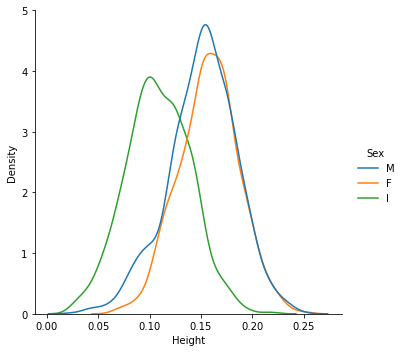

In [12]:
# KDEs of the three sex categories to view the distribution of the variables (height)
sns.displot(x=dependent, hue=independent, kind="kde");

In [13]:
# Extract the female heights.
Height_female = dependent[independent == 'F']
Height_female.describe()

count    1305.000
mean        0.157
std         0.029
min         0.065
25%         0.140
50%         0.160
75%         0.175
max         0.250
Name: Height, dtype: float64

In [14]:
# Extract the male heights.
Height_male = dependent[independent == 'M']
Height_male.describe()

count    1526.000
mean        0.151
std         0.034
min         0.025
25%         0.130
50%         0.155
75%         0.175
max         0.250
Name: Height, dtype: float64

In [15]:
# Extract the infant heights.
Height_infant = dependent[independent == 'I']
Height_infant.describe()

count    1336.000
mean        0.108
std         0.031
min         0.025
25%         0.090
50%         0.110
75%         0.130
max         0.220
Name: Height, dtype: float64

##### Shapiro Wilk Test

The Shapiro-Wilk test first quantifies the similarity between the observed and normal distributions as a single number.  It superimposes a normal curve over the observed distribution as shown below. It then computes which percentage of our sample overlaps with it.

A perfect normal distribution will have a Shapiro-Wilk value of 1.00. Values less than 1.00 indicate an increasing departure from a perfect normal shape. The null hypothesis of the Shapiro-Wilk test is that the variable is normally distributed. When the Shapiro-Wilk test indicates a p value less than .05 this suggests that the distribution is not normal and the null hypothesis is rejected.

In [16]:
# Test the accuracy of the Shapiro Wilks Test on a randomly generated dataset
array = np.random.normal(0.16,0.03,1000)
ss.shapiro(array)

ShapiroResult(statistic=0.9973412752151489, pvalue=0.10026334971189499)

In [17]:
# Run the Shapiro-Wilk test for female heights
ss.shapiro(dependent[independent == 'F'])

ShapiroResult(statistic=0.9959923624992371, pvalue=0.0017051880713552237)

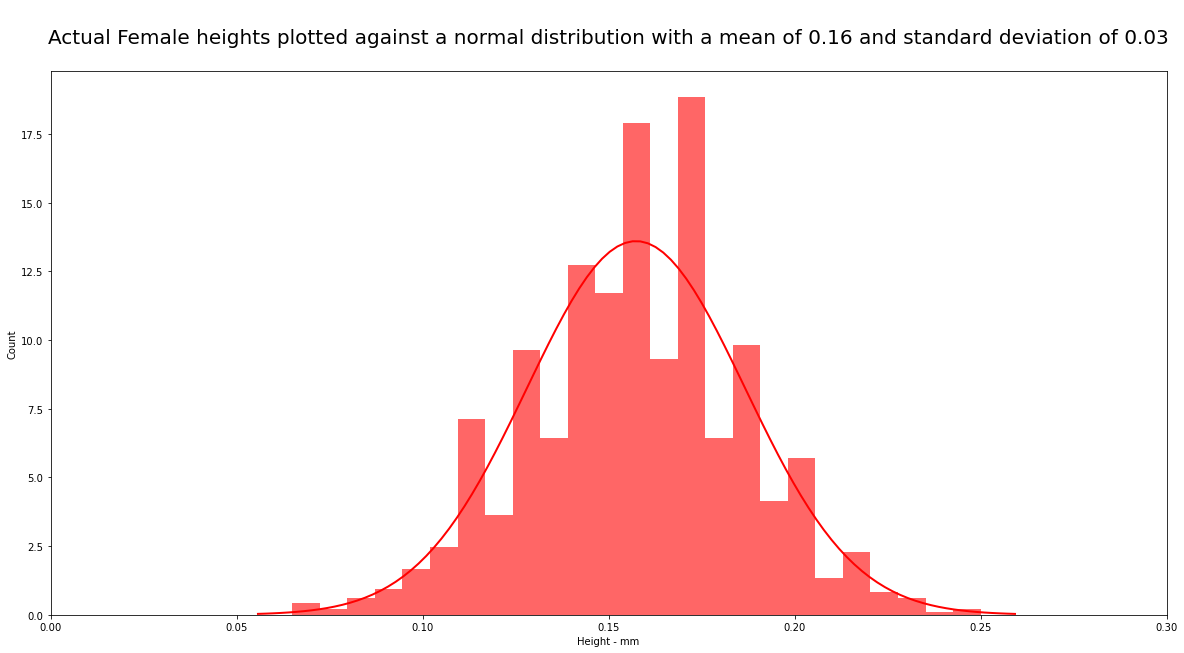

In [26]:
## Visualise the actual female heights versus the normal distribution as a plot

# Make the plots bigger.
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Fit a normal distribution to the data using mean and standard deviation values
mu, std = norm.fit(Height_female) 
  
# Plot the histogram.
plt.hist(Height_female, bins=25, density=True, alpha=0.6, color='r')
  
# Plot the probability density function (pdf)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.xlim(0.0,0.3)
plt.plot(x, p, 'k', linewidth=2, color = 'r')
title = "\nActual Female heights plotted against a normal distribution with a mean of {:.2f} and standard deviation of {:.2f}\n".format(mu, std)
plt.title(title, fontsize=20)
plt.xlabel("Height - mm")
plt.ylabel("Count")
plt.show();

In [19]:
# Run the Shapiro-Wilk test for male heights
ss.shapiro(dependent[independent == 'M'])

ShapiroResult(statistic=0.9894710779190063, pvalue=4.808848874660043e-09)

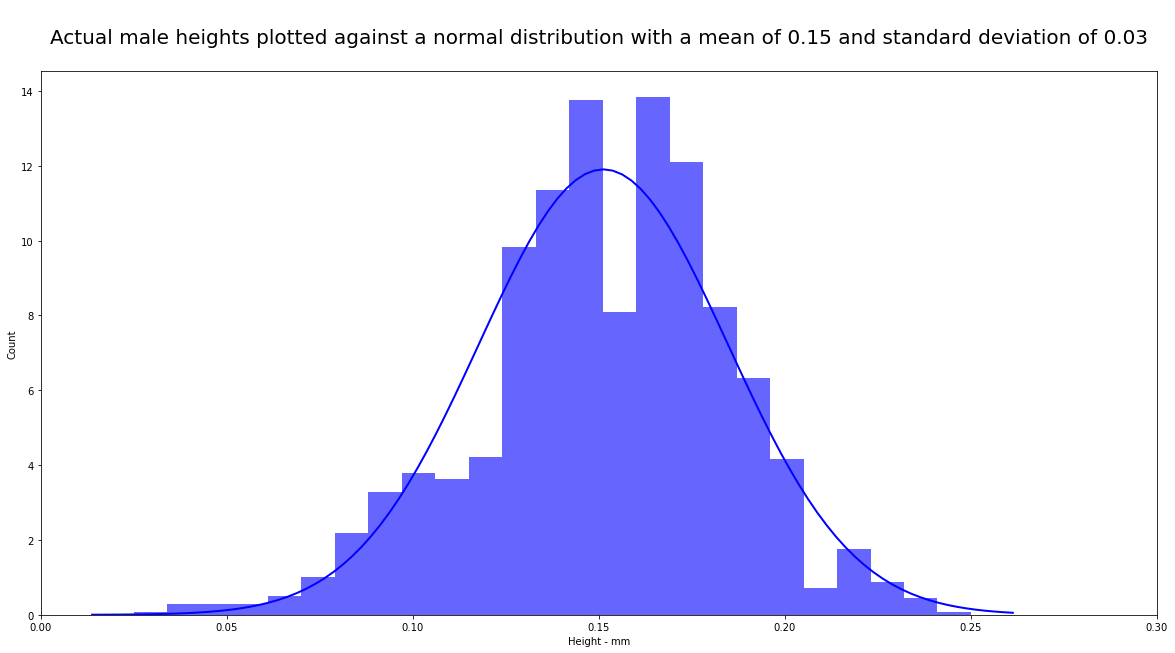

In [27]:
# Visualise the actual male heights versus the normal distribution as a plot

# Fit a normal distribution to the data using mean and standard deviation values
mu, std = norm.fit(dependent[independent == 'M']) 
  
# Plot the histogram.
plt.hist(dependent[independent == 'M'], bins=25, density=True, alpha=0.6, color='b')
  
# Plot the probability density function (pdf)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.xlim(0.0,0.3)
plt.plot(x, p, 'k', linewidth=2, color = 'b')
title = "\nActual male heights plotted against a normal distribution with a mean of {:.2f} and standard deviation of {:.2f}\n".format(mu, std)
plt.title(title, fontsize=20)
plt.xlabel("Height - mm")
plt.ylabel("Count")
plt.show();

In [21]:
# Run the Shapiro-Wilk test for infant heights
ss.shapiro(dependent[independent == 'I'])

ShapiroResult(statistic=0.9963489770889282, pvalue=0.0029711173847317696)

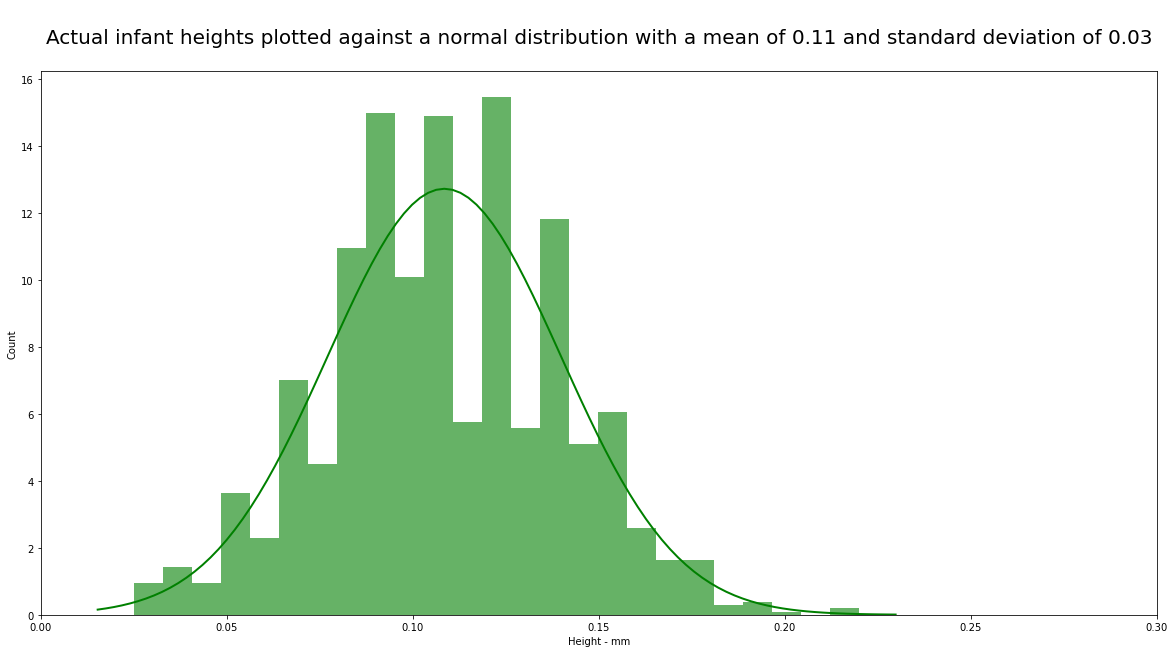

In [28]:
# Plot the actual infant heights versus the normal distribution

# Fit a normal distribution to the data using mean and standard deviation values
mu, std = norm.fit(dependent[independent == 'I']) 
  
# Plot the histogram.
plt.hist(dependent[independent == 'I'], bins=25, density=True, alpha=0.6, color='g')
  
# Plot the probability density function (pdf)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.xlim(0.0,0.3)
plt.plot(x, p, 'k', linewidth=2, color = 'g')
title = ("\nActual infant heights plotted against a normal distribution with a mean of {:.2f} and standard deviation of {:.2f}\n".format(mu, std))
plt.title(title, fontsize=20)
plt.xlabel("Height - mm")
plt.ylabel("Count")
plt.show();

##### Normality Conclusion:

As a rule of thumb, we reject the null hypothesis if the p value is less than 0.05 so we conclude in this case that our variable (Height) for all sex classes is not normally distributed.  This means that less than 95% of the acual dataset overlaps with the normally disributed dataset.

<br>

#### Assumption 6: Homogeneity of Variances

***
Run levene test to test for homogeneity. 

The null hypothesis for the Levene test is that group variances are equal. A p value less than 0.05 indicates that the assumption of homogeneity of variance assumption has been violated.

**variance = (mean - sample) ^ 2**

In [23]:
# Test for equal variances.
ss.levene(
    dependent[independent == 'F'],
    dependent[independent == 'M'],
    dependent[independent == 'I']
)

LeveneResult(statistic=7.27082570825271, pvalue=0.0007044033075454511)

#### Homogeneity Conclusion:
As the p value is less than 0.05, the variances are unequal and the assumption of homogeneity of variances have failed the levene test i.e. the null hypothesis is rejected

### One Way Anova
____________

ANOVA uses the F-test for statistical significance. This allows for comparison of multiple means at once, because the error is calculated for the whole set of comparisons rather than for each individual two-way comparison (which would happen with a t-test).

The F-test compares the variance in each group mean from the overall group variance. If the variance within groups is smaller than the variance between groups, the F-test will find a higher F-value, and therefore a higher likelihood that the difference observed is real and not due to chance.

In [24]:
# Compare the means manually
print("The mean of female heights is",round(dependent[independent == 'F'].mean(),3))
print("The mean of male heights is",round(dependent[independent == 'M'].mean(),3))
print("The mean of infant heights is",round(dependent[independent == 'I'].mean(),3))

The mean of female heights is 0.157
The mean of male heights is 0.151
The mean of infant heights is 0.108


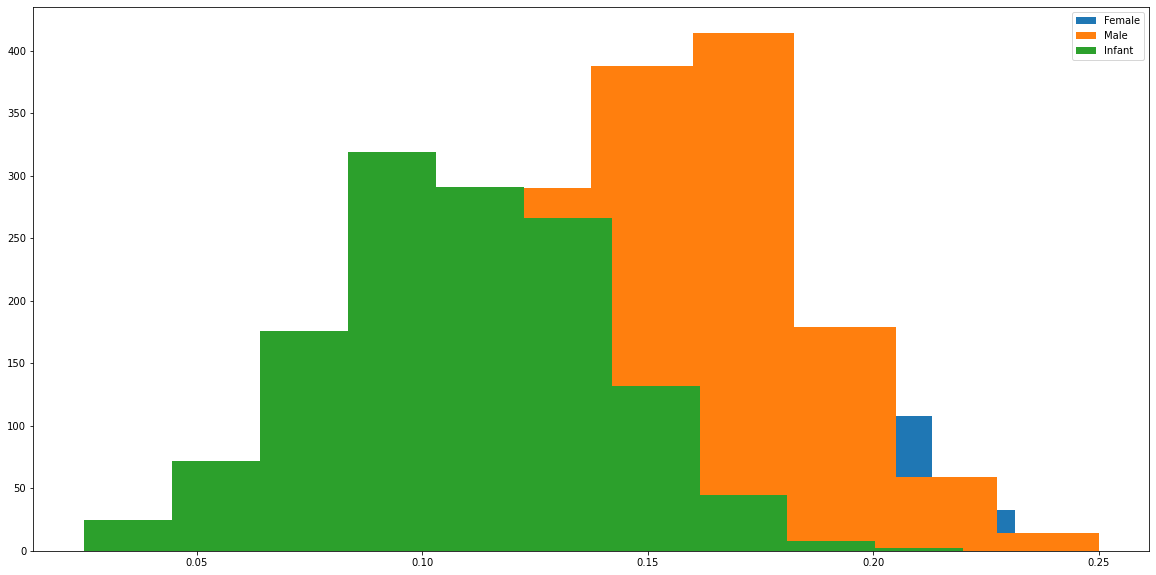

In [30]:
# Plot the variables
plt.hist(dependent[independent == 'F'], label='Female')
plt.hist(dependent[independent == 'M'], label='Male')
plt.hist(dependent[independent == 'I'], label='Infant')
plt.legend()
plt.show()

In [ ]:
# Run ANOVA f distribution
ss.f_oneway(
    dependent[independent == 'F'],
    dependent[independent == 'M'],
    dependent[independent == 'I']
)

**Conclusion:**
As the p-value is less then 0.5 we can conclude that the mean heights of male, female and infant abalones are different.

### Post Hoc Testing
_______________

ANOVA will tell you if there are differences among the levels of the independent variable, but not which differences are significant. To find how the treatment levels differ from one another, perform a TukeyHSD (Tukey’s Honestly-Significant Difference) post-hoc test.  The Tukey test runs pairwise comparisons among each of the groups, and uses a conservative error estimate to find the groups which are statistically different from one another.

In [ ]:
# Perform the Tukey test
tukey = pairwise_tukeyhsd(endog=df['Height'], groups=df['Sex'], alpha=0.05)
print(tukey)

**Interpreting the results of the tukey test** <br/>
- P-value for the difference in means between F and I: (0.0493)
- P-value for the difference in means between F and M: (0.0061)
- P-value for the difference in means between I and M:  0.0432

Therefore we would conclude that there is a statistically significant difference between the means of all groups

In [ ]:
# Visualising the results of the Tukey test
rows = tukey.summary().data[1:]
plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
plt.gca().set_yticks( range( len( rows ) ) )
plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
plt.show()

Confidence intervals that cross the vertical, dashed line at  are those in which the means across those groups may be equal. Other intervals have mean differences whose 95% confidence intervals do not include zero.  In this case the male/female datasets have the closest means

### T-Test
___________

In [ ]:
# Visualise the actual male heights versus the normal distribution as a plot

# Fit a normal distribution to the data using mean and standard deviation values
mu1, std1 = norm.fit(dependent[independent == 'M']) 
  
# Plot the histogram.
plt.hist(dependent[independent == 'M'], bins=25, density=True, alpha=0.6, color='b', label = "Male")
  
# Plot the probability density function (pdf) of male heights
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu1, std1)
plt.xlim(0.0,0.3)
plt.plot(x, p, 'k', linewidth=2, color = 'b')

# Fit a normal distribution to the data using mean and standard deviation values
mu2, std2 = norm.fit(dependent[independent == 'F']) 
  
# Plot the histogram.
plt.hist(dependent[independent == 'F'], bins=25, density=True, alpha=0.6, color='r', label = "Female")
  
# Plot the probability density function (pdf) of female heights
p = norm.pdf(x, mu2, std2)
plt.xlim(0.0,0.3)
plt.plot(x, p, 'k', linewidth=2, color = 'r')

# Fit a normal distribution to the data using mean and standard deviation values
mu3, std3 = norm.fit(dependent[independent == 'I']) 
  
# Plot the histogram.
plt.hist(dependent[independent == 'I'], bins=25, density=True, alpha=0.6, color='g', label = "Infant")
  
# Plot the probability density function (pdf) of female heights
p = norm.pdf(x, mu3, std3)
plt.xlim(0.0,0.3)
plt.plot(x, p, 'k', linewidth=2, color = 'g')

title = "\nActual male, female & infant heights plotted against normal distributions\n"
plt.title(title, fontsize=20)
plt.xlabel("\nHeight - mm")
plt.ylabel("Count\n")
plt.legend()
plt.show();

In [ ]:
# Calculate the independent samples t-statistic for the samples.
stats.ttest_ind(dependent[independent == 'F'],dependent[independent == 'M'])

In [ ]:
# Run a t-test using Sex and Height as variables
print(stats.ttest_ind(dependent[independent == 'F'],dependent[independent == 'M']))
print(stats.ttest_ind(dependent[independent == 'F'],dependent[independent == 'I']))
print(stats.ttest_ind(dependent[independent == 'M'],dependent[independent == 'I']))

In [ ]:
# Look at Sex and Shell Weight as an alternative variables
M = df[df['Sex'] == 'M']
F = df[df['Sex'] == 'F']
I = df[df['Sex'] == 'I']

In [ ]:
print(stats.ttest_ind(F['Shell_Weight'], M['Shell_Weight']))
print(stats.ttest_ind(F['Shell_Weight'], I['Shell_Weight']))
print(stats.ttest_ind(M['Shell_Weight'], I['Shell_Weight']))

#### References:

[1] https://docs.scipy.org/doc/scipy/reference/stats.html

[2] https://www.tutorialspoint.com/scipy/scipy_stats.htm

[3] http://specminor.org/2017/01/11/python-descriptive-statistics-scipy.html#:~:text=The%20statistics%20library%20par%20excellence%20for%20Python%20is,bunch%20of%20descriptive%20statistics%20at%20once%2C%20scipy.stats.describe%20%28%29%3A

[4] https://programming-review.com/python/scipy-examples#:~:text=Statsmodels%20has%20scipy.stats%20as%20a%20dependency.%20Scipy.stats%20has,it%20works%20with%20pandas%20out%20of%20the%20box

[5] https://docs.scipy.org/doc/scipy/reference/stats.html

[6] https://data-flair.training/blogs/scipy-statistical-functions/#:~:text=The%20scipy.stats%20is%20the%20SciPy%20sub-package.%20It%20is,functionality%20is%20expanding%20as%20the%20library%20is%20open-source.

[7] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html

[8] https://www.bing.com/search?q=cdf+method&cvid=c65ee34bfef34d37ba0399662d25bbbe&aqs=edge.0.0j69i57j0l3.2763j0j1&pglt=163&FORM=ANNTA1&PC=U531

[9] https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/probability-distributions/how-to/cumulative-distribution-function-cdf/methods-and-formulas/methods-and-formulas/#:~:text=%20Methods%20and%20formulas%20for%20Cumulative%20Distribution%20Function,a%20standard%20normal%20distribution%2C%20X%202...%20More%20

[10] https://integratedmlai.com/normal-distribution-an-introductory-guide-to-pdf-and-cdf/#:~:text=The%20probability%20density%20function%20%28PDF%29%20is%20a%20statistical,the%20interval%20in%20which%20the%20variable%20will%20fall.

[11] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

[12] https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php

[13] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

[14] https://www.spss-tutorials.com/spss-shapiro-wilk-test-for-normality/

[15] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

[16] https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

[17] https://seaborn.pydata.org/generated/seaborn.boxplot.html

[18] https://splendidwritings.com/testing-assumptions-the-shapiro-wilk-test-and-the-levene-test/

[19] https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/

[20] https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

[21] https://www.scribbr.com/statistics/one-way-anova/

[22] https://nathancarter.github.io/how2data/site/how-to-perform-post-hoc-analysis-with-tukey-s-hsd-test-in-python-using-statsmodels-matplotlib-and-scikit/

[23] https://www.statology.org/tukey-test-python/